# **EDA Proyecto 4 IA**

El presente análisis exploratorio de datos (EDA) se realiza sobre el conjunto de datos **`online_gaming_insights.csv`**, que recopila información sobre el **comportamiento y las preferencias de jugadores en línea**. La base incluye variables demográficas (edad, género, país), hábitos de juego (horas jugadas, frecuencia semanal, tipo de dispositivo), motivaciones y nivel de interacción social, junto con la variable objetivo **`EngagementLevel`**, que representa el grado de compromiso del jugador con la plataforma (por ejemplo, *High*, *Medium* o *Low*).

El propósito del EDA es comprender la estructura de los datos, identificar posibles problemas de calidad y descubrir patrones o relaciones relevantes entre las variables que puedan influir en el nivel de engagement.

Durante este proceso se realizará:

1. Revisión del porcentaje de valores nulos y de ceros, verificando su impacto y sentido en las variables.
2. Análisis descriptivo y visual mediante histogramas, gráficos de barras y distribución de la variable objetivo.
3. Detección y tratamiento de registros inconsistentes y outliers.
4. Generación de un **mapa de calor de correlación** para eliminar variables altamente correlacionadas y evitar redundancias.
5. Aplicación de un algoritmo de **agrupamiento (K-Means, K-Medoids o SOM)** para segmentar los jugadores según sus características, determinando el número óptimo de clusters mediante el coeficiente de silueta o el método del codo.
6. Descripción interpretativa de los clusters formados, destacando las diferencias principales entre ellos.

Con estos pasos, el EDA permitirá establecer una base sólida para la etapa posterior de modelado, garantizando que los datos utilizados sean representativos, limpios y útiles para generar un modelo de aprendizaje automático confiable.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## *Lectura del archivo y pequeña muestra*

In [ ]:

path = "/content/online_gaming_insights.csv"

df = pd.read_csv(path)

print("Shape:", df.shape)
display(df.head(20))


Shape: (40034, 13)


,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium
5,9005,37,Male,Europe,RPG,20.561855,0,Easy,2,81,74,22,Low
6,9006,25,Male,USA,Action,9.752716,0,Hard,1,50,13,2,Low
7,9007,25,Female,Asia,RPG,4.401729,0,Medium,10,48,27,23,Medium
8,9008,38,Female,Europe,Simulation,18.152733,0,Easy,5,101,23,41,Medium
9,9009,38,Female,Other,Sports,23.942772,0,Easy,13,95,99,36,High


##*Porcentaje de nulos en la base de datos*

El código:
* Calcula nulos por columna (`nulos`) y % de nulos (`pct_nulos`).
* Incluye tipo de dato (`tipo_dato`) y # de valores únicos no nulos (`unicos`).
* Devuelve un DataFrame ordenado por **mayor % de nulos**, con la columna `columna` como nombre de variable.
* Muestra ese resumen (`display(res_n)`).
* Calcula e imprime el **% de nulos global** sobre todo el DataFrame.


In [ ]:
def resumen_nulos(df: pd.DataFrame) -> pd.DataFrame:
    s_null = df.isna().sum()
    s_pct  = (df.isna().mean() * 100).round(2)
    s_uniq = df.nunique(dropna=True)
    return (
        pd.DataFrame({"tipo_dato": df.dtypes.astype(str),
                      "nulos": s_null,
                      "pct_nulos": s_pct,
                      "unicos": s_uniq})
        .sort_values("pct_nulos", ascending=False)
        .reset_index(names="columna")
    )

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
res_n = resumen_nulos(df)
display(res_n)
pct_nulos_global = (df.isna().sum().sum() / (df.shape[0]*df.shape[1]) * 100).round(2)
print(f"PORCENTAJE DE NULOS GLOBAL: {pct_nulos_global}%")


,columna,tipo_dato,nulos,pct_nulos,unicos
0,PlayerID,int64,0,0.0,40034
1,Age,int64,0,0.0,35
2,Gender,object,0,0.0,2
3,Location,object,0,0.0,4
4,GameGenre,object,0,0.0,5
5,PlayTimeHours,float64,0,0.0,40034
6,InGamePurchases,int64,0,0.0,2
7,GameDifficulty,object,0,0.0,3
8,SessionsPerWeek,int64,0,0.0,20
9,AvgSessionDurationMinutes,int64,0,0.0,170


PORCENTAJE DE NULOS GLOBAL: 0.0%


## *Porcentaje de ceros en la base de datos*

El código:
*  Analiza solo columnas numéricas.
*  Cuenta cuántos ceros tiene cada columna.
*  Calcula el % de ceros por columna.
*  Devuelve un DataFrame con:

  * `columna`
  * `ceros`
  * `pct_ceros`
    (ordenado de mayor a menor).
*  Calcula también el % de ceros global (en todas las columnas numéricas juntas).
*  Muestra la tabla y el porcentaje total de ceros.


In [ ]:
def resumen_ceros(df: pd.DataFrame) -> pd.DataFrame:
    num_cols = df.select_dtypes(include=[np.number]).columns
    zeros = (df[num_cols] == 0).sum()
    pct0  = ((df[num_cols] == 0).mean() * 100).round(2)
    return (pd.DataFrame({"ceros": zeros, "pct_ceros": pct0})
            .sort_values("pct_ceros", ascending=False)
            .reset_index(names="columna"))

res_0 = resumen_ceros(df)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
display(res_0)

tot_celdas_num = df.select_dtypes(include=[np.number]).size
pct_ceros_global = ((df.select_dtypes(include=[np.number]) == 0).sum().sum() / tot_celdas_num * 100).round(2) if tot_celdas_num else 0.0
print(f"% de 0’s GLOBAL (solo numéricas): {pct_ceros_global}%")


,columna,ceros,pct_ceros
0,InGamePurchases,31993,79.91
1,SessionsPerWeek,1967,4.91
2,AchievementsUnlocked,810,2.02
3,PlayerID,0,0.00
4,PlayTimeHours,0,0.00
5,Age,0,0.00
6,AvgSessionDurationMinutes,0,0.00
7,PlayerLevel,0,0.00


% de 0’s GLOBAL (solo numéricas): 10.86%


## *Decir todas las variables de la base de datos*

El código:
* Muestra número total de columnas y lista sus nombres.
* Calcula por columna: tipo de dato, conteo y porcentaje de nulos, y número de valores únicos (sin nulos).
* Ordena el resumen por índice (nombre de columna) y lo muestra.


In [ ]:
import pandas as pd

# === Listar todas las variables (usando el df ya cargado) ===
print(f"Total de variables: {df.shape[1]}")
print("====================================")
print("Listado de columnas:\n")

for i, col in enumerate(df.columns, start=1):
    print(f"{i:>3}. {col}")

# === Resumen rápido de variables ===
print("\nResumen por columna:")
resumen = (
    pd.DataFrame({
        "tipo_dato": df.dtypes.astype(str),
        "nulos": df.isna().sum(),
        "pct_nulos": (df.isna().mean() * 100).round(2),
        "unicos": df.nunique(dropna=True)
    })
    .sort_index()
)
display(resumen)


Total de variables: 13
Listado de columnas:

  1. PlayerID
  2. Age
  3. Gender
  4. Location
  5. GameGenre
  6. PlayTimeHours
  7. InGamePurchases
  8. GameDifficulty
  9. SessionsPerWeek
 10. AvgSessionDurationMinutes
 11. PlayerLevel
 12. AchievementsUnlocked
 13. EngagementLevel

Resumen por columna:


,tipo_dato,nulos,pct_nulos,unicos
AchievementsUnlocked,int64,0,0.0,50
Age,int64,0,0.0,35
AvgSessionDurationMinutes,int64,0,0.0,170
EngagementLevel,object,0,0.0,3
GameDifficulty,object,0,0.0,3
GameGenre,object,0,0.0,5
Gender,object,0,0.0,2
InGamePurchases,int64,0,0.0,2
Location,object,0,0.0,4
PlayTimeHours,float64,0,0.0,40034


### **Explicación de resultados**

El conjunto de datos cuenta con **13 variables** y **no presenta valores nulos**, lo que indica una base limpia y completa. Las variables son de tipo **numérico (int64 o float64)** y **categórico (object)**, con diferentes niveles de cardinalidad: las numéricas tienen un rango amplio de valores únicos (por ejemplo, *PlayTimeHours* con 40.034 valores distintos), mientras que las categóricas presentan pocos niveles, como *Gender* (2), *GameDifficulty* (3) o *GameGenre* (5). Esto sugiere que el dataset combina datos cuantitativos continuos y cualitativos discretos, adecuados para análisis descriptivos y modelos predictivos.


## *Graficar variables*

* Define parámetros generales:

  * `MAX_PLOTS`: máximo de variables a graficar.
  * `MAX_CATS`: máximo de categorías a mostrar en variables categóricas.
  * `PREFER_NUMERIC`: si es True, grafica primero las columnas numéricas.

* Función `graficar_variable(df, col, max_cats)`:

  * Si la columna es numérica, dibuja un histograma.
  * Si es categórica, muestra un gráfico de barras con las categorías más frecuentes (hasta `max_cats`).
  * Ajusta el tamaño del gráfico y las etiquetas.

* Función `graficar_hasta_n(df, n, prefer_numeric, max_cats)`:

  * Separa las columnas numéricas y categóricas.
  * Elige el orden de graficado según la preferencia.
  * Muestra un mensaje de progreso al graficar.
  * Llama a `graficar_variable` para cada columna seleccionada.

* Llamada final:

  * Ejecuta `graficar_hasta_n` con los parámetros definidos para generar los gráficos.




Graficando las primeras 13 columnas (de 13 totales).
[1/13] PlayerID


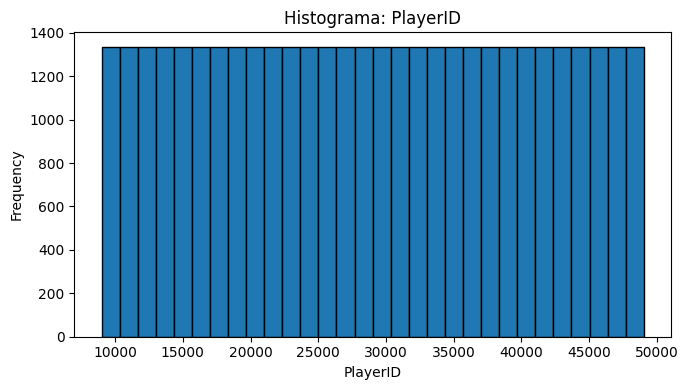

[2/13] Age


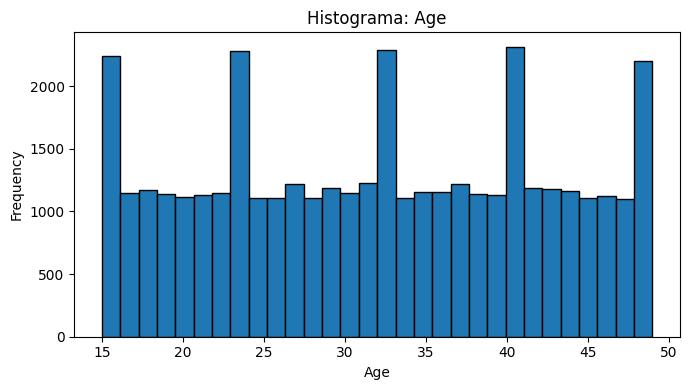

[3/13] Gender


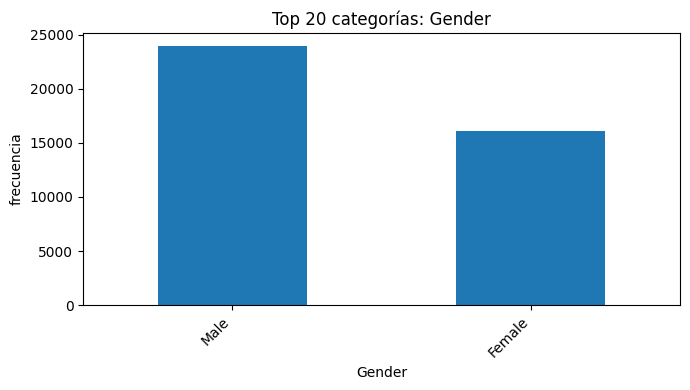

[4/13] Location


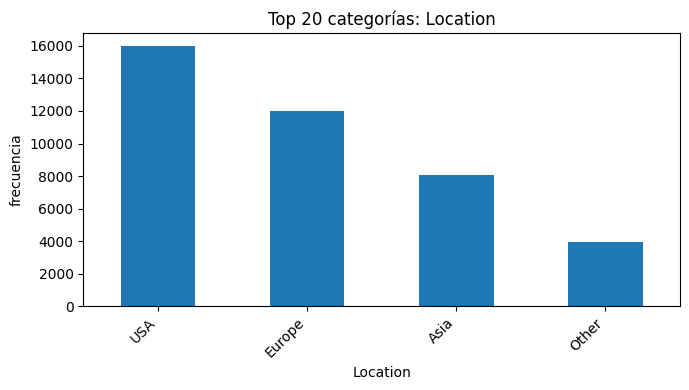

[5/13] GameGenre


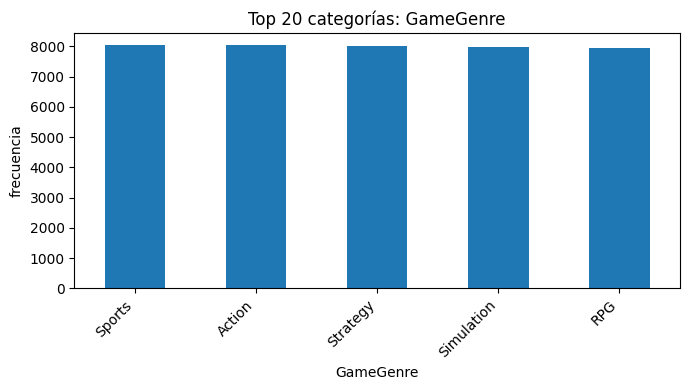

[6/13] PlayTimeHours


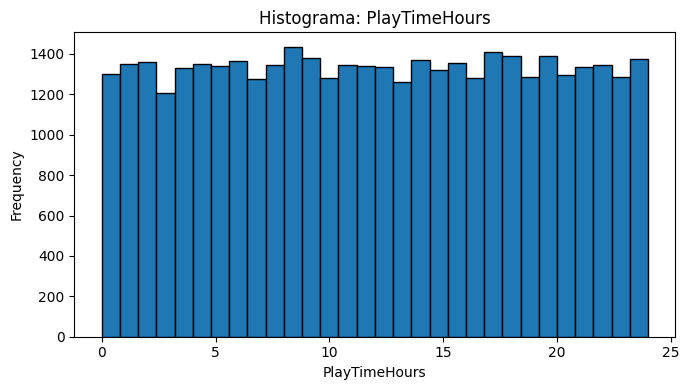

[7/13] InGamePurchases


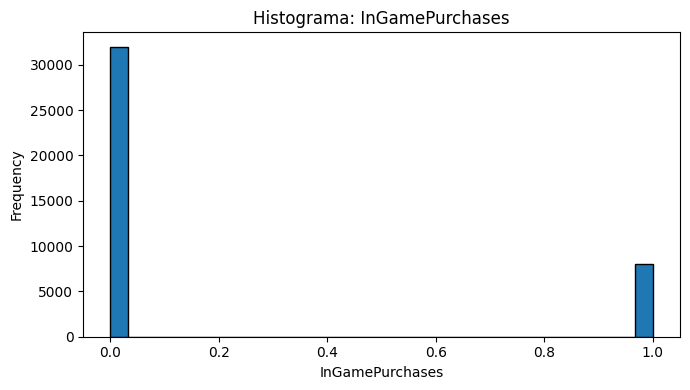

[8/13] GameDifficulty


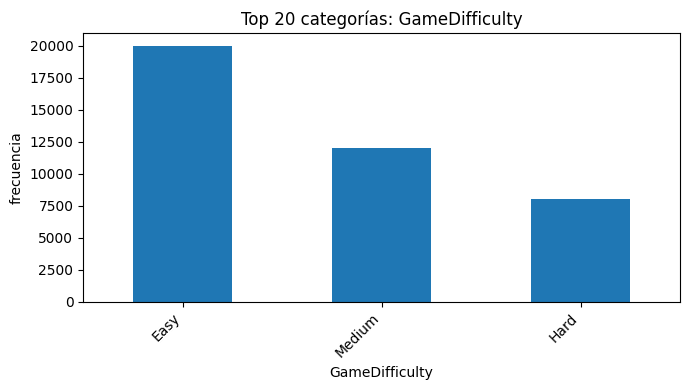

[9/13] SessionsPerWeek


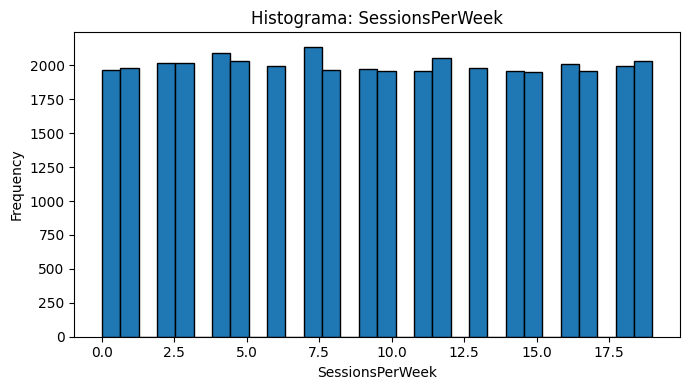

[10/13] AvgSessionDurationMinutes


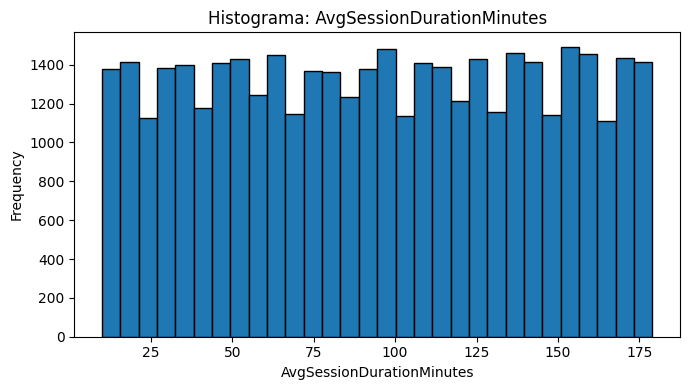

[11/13] PlayerLevel


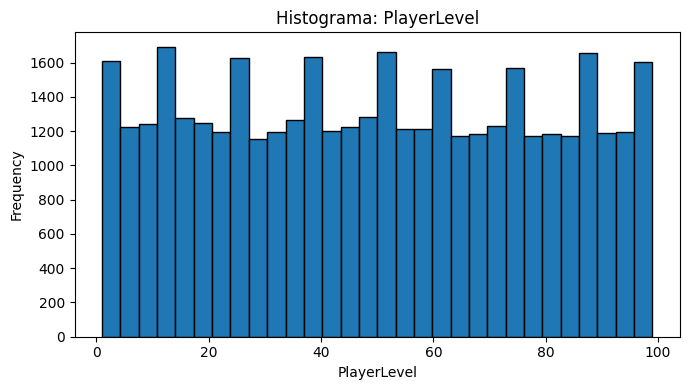

[12/13] AchievementsUnlocked


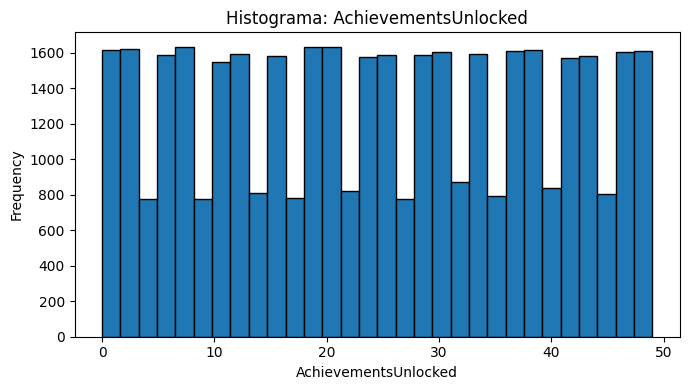

[13/13] EngagementLevel


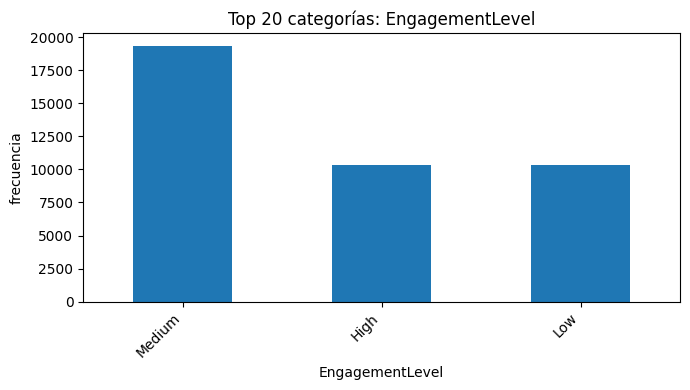

In [ ]:
# ===== Parámetros =====
N = 100
MAX_CATS = 20  # máx. barras para columnas categóricas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Comprobación básica
if "df" not in globals():
    raise RuntimeError("No encuentro la variable 'df'. Asegúrate de haber cargado matchData.csv en 'df' antes.")

cols = list(df.columns[:N])
print(f"Graficando las primeras {len(cols)} columnas (de {df.shape[1]} totales).")

def plot_col(data: pd.DataFrame, col: str, max_cats: int = 20):
    s = data[col]
    plt.figure(figsize=(7,4))
    if pd.api.types.is_numeric_dtype(s):
        # Histograma para numéricas
        s.plot(kind="hist", bins=30, edgecolor="black")
        plt.xlabel(col); plt.title(f"Histograma: {col}")
    else:
        # Barras para categóricas (limitando cardinalidad)
        vc = s.astype("string").value_counts(dropna=False).head(max_cats)
        vc.plot(kind="bar")
        plt.ylabel("frecuencia"); plt.title(f"Top {max_cats} categorías: {col}")
        plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
    plt.close()

for i, c in enumerate(cols, 1):
    try:
        print(f"[{i}/{len(cols)}] {c}")
        plot_col(df, c, MAX_CATS)
    except Exception as e:
        print(f"   (omitida por error: {e})")


### **Explicación de las gráficas**

**1. Histograma: PlayerID**

* **Qué muestra:** la distribución de los identificadores de jugador (PlayerID).
* **Interpretación:** todos los IDs aparecen con la misma frecuencia, lo que indica que esta columna es simplemente un **identificador único**, no una variable útil para el análisis.
* **Conclusión:** se puede **excluir del análisis estadístico o predictivo**, ya que no aporta información sobre el comportamiento o características de los jugadores.

**2. Histograma: Age**

* **Qué muestra:** la distribución de edades de los jugadores.
* **Interpretación:** la mayoría de las edades están entre 15 y 50 años, con varios picos marcados cada 5 años (por ejemplo 15, 20, 25, 30, 35, 40, 45).
  Esto sugiere que los datos pueden haber sido **generados artificialmente o agrupados por rangos**, no capturados de manera continua.
* **Conclusión:** la población de jugadores es variada en edad, pero la distribución **no es natural ni aleatoria**, sino regular.

**3. Barras: Gender**

* **Qué muestra:** proporción de género entre los jugadores.
* **Interpretación:** hay **más jugadores masculinos (Male)** que femeninos (Female).
  Aproximadamente un 60% son hombres y un 40% mujeres (estimado por las alturas).
* **Conclusión:** el conjunto de datos tiene un **leve desbalance de género**, algo importante si se busca analizar comportamiento o preferencias por género.

**4. Barras: Location**

* **Qué muestra:** ubicación o región de los jugadores.
* **Interpretación:** la mayoría proviene de **USA**, seguido por **Europa**, luego **Asia**, y finalmente una categoría “Other”.
* **Conclusión:** hay un **dominio de jugadores estadounidenses** y una representación decreciente por región.
  Es útil considerar esto en análisis de comportamiento, ya que la región puede influir en los hábitos de juego.

**5. Barras: GameGenre**

* **Qué muestra:** géneros de juego más jugados.
* **Interpretación:** las cinco categorías (Sports, Action, Strategy, Simulation, RPG) tienen **frecuencias casi idénticas**.
* **Conclusión:** no hay un género dominante; los datos están **balanceados artificialmente**, lo que puede indicar que el dataset fue equilibrado para análisis o entrenamiento de modelos.

**6. Histograma: PlayTimeHours**

* **Qué muestra:** horas de juego registradas.
* **Interpretación:** los valores están **uniformemente distribuidos entre 0 y 25 horas**, sin concentraciones.
* **Conclusión:** parece una **distribución uniforme**, poco realista para comportamiento humano (normalmente se concentraría en pocas horas).
  Probablemente fue **simulada** o generada de forma controlada.

**7. Histograma: InGamePurchases**

* **Qué muestra:** si el jugador realiza o no compras dentro del juego (0 = no, 1 = sí).
* **Interpretación:** hay una **gran mayoría de 0**, y una **minoría pequeña de 1**.
* **Conclusión:** sólo una **pequeña fracción de jugadores hace compras**. Este desbalance puede afectar modelos de predicción (habría que balancear clases).

**8. Barras: GameDifficulty**

* **Qué muestra:** nivel de dificultad preferido o jugado.
* **Interpretación:** la mayoría prefiere **Easy**, seguido de **Medium**, y finalmente **Hard**.
* **Conclusión:** el dataset refleja que **los jugadores tienden a elegir niveles fáciles**, lo cual puede correlacionarse con retención o experiencia de usuario.


 **9. Histograma: SessionsPerWeek**

* **Qué muestra:** número de sesiones de juego por semana.
* **Interpretación:** distribución bastante uniforme entre 0 y 18 sesiones, sin picos claros.
* **Conclusión:** no hay una concentración en un rango específico, lo que nuevamente sugiere datos **uniformes o simulados**.

**10. Histograma: AvgSessionDurationMinutes**

* **Qué muestra:** duración promedio de las sesiones (en minutos).
* **Interpretación:** también uniforme entre 0 y 180 minutos, sin tendencia o sesgo visible.
* **Conclusión:** los jugadores parecen tener **duraciones medias distribuidas uniformemente**, lo que **no representa un patrón realista** de comportamiento (normalmente sería sesgado hacia duraciones cortas).

**11) Histograma: PlayerLevel**

* **Qué muestra:** niveles del jugador del 1 al 100.
* **Lectura:** la densidad es casi **uniforme** en todo el rango; no hay concentración clara en niveles bajos o altos.
* **Conclusión:** distribución poco realista para datos “naturales” (lo normal sería sesgo a niveles bajos-medios). Probable **datos simulados/equilibrados**; no hay un “nivel típico” dominante.

**12) Histograma: AchievementsUnlocked**

* **Qué muestra:** cantidad de logros desbloqueados (0–50).
* **Lectura:** también parece **uniforme**; casi la misma frecuencia para cada conteo de logros, sin picos en 0, 1–3 o rangos medios.
* **Conclusión:** refuerza la idea de **generación controlada**. En escenarios reales suele haber **concentración en pocos logros** y una cola hacia muchos.

**13) Barras: EngagementLevel**

* **Qué muestra:** etiqueta de engagement (Low / Medium / High).
* **Lectura:** **Medium** es la categoría mayoritaria; **High** y **Low** están en proporciones similares y menores.
* **Conclusión:** hay **desbalance moderado** hacia Medium. Si usas esta variable como target/clase, conviene: (a) validar métricas robustas al desbalance, o (b) considerar **reponderación/estratificación** para modelos de clasificación.


## *Grafica de salida*

El código:
* Define parámetros: `TARGET`, `TOP_K`, `MAX_CATS`.
* Carga el `df` si no existe y valida que `TARGET` esté en las columnas.
* Detecta tipo de tarea: regresión si `TARGET` es numérica con >2 valores; clasificación si es categórica o tiene pocas clases.
* Para clasificación: convierte el target a categorías y guarda la lista de clases.
* Calcula un “score” univariado por columna para rankear relevancia frente al target:

  * Numérica vs clase: ANOVA univar (R² entre 0 y 1).
  * Categórica vs clase: Cramér’s V con corrección de sesgo.
  * Para regresión: Pearson |r| si la feature es numérica; si es categórica usa Cramér’s V tras discretizar el target.
* Filtra columnas con cardinalidad categórica extrema para evitar tablas gigantes.
* Ordena por score y muestra el ranking de las TOP_K features.
* Genera gráficos adecuados según tipo de variable y tarea:

  * Clasificación: boxplots de numéricas por clase; barras agrupadas con proporciones de clases por categoría.
  * Regresión: dispersión numérica vs target; barras con media del target por categoría.
* Limita categorías mostradas a `MAX_CATS` y anota tamaños de muestra cuando aplica.
* Usa `matplotlib`, maneja NaNs y captura excepciones para no romper el flujo al graficar.


TOP features por relación con la salida (score univar):


,feature,score
8,SessionsPerWeek,0.367425
9,AvgSessionDurationMinutes,0.236715
11,AchievementsUnlocked,0.005815
10,PlayerLevel,0.005373
4,GameGenre,0.002763
7,GameDifficulty,0.001471


Graficando 6 columnas con mayor relación con 'EngagementLevel' (TASK=clf, clases=['Medium', 'High', 'Low']).
[1/6] SessionsPerWeek  (score=0.3674)


/tmp/ipython-input-543533916.py:136: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showmeans=True)


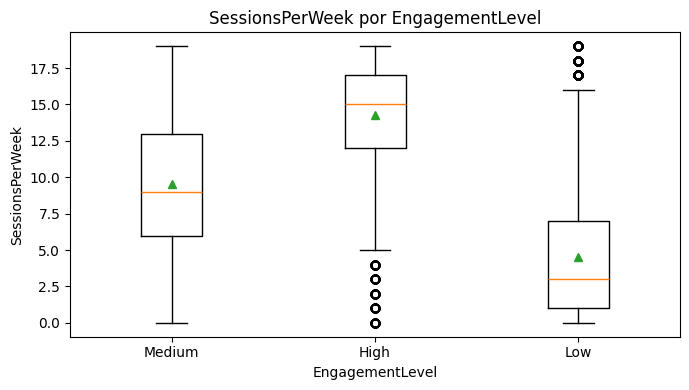

[2/6] AvgSessionDurationMinutes  (score=0.2367)


/tmp/ipython-input-543533916.py:136: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showmeans=True)


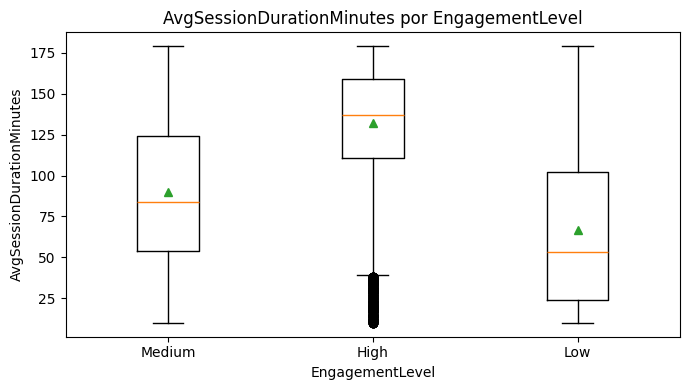

[3/6] AchievementsUnlocked  (score=0.0058)


/tmp/ipython-input-543533916.py:136: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showmeans=True)


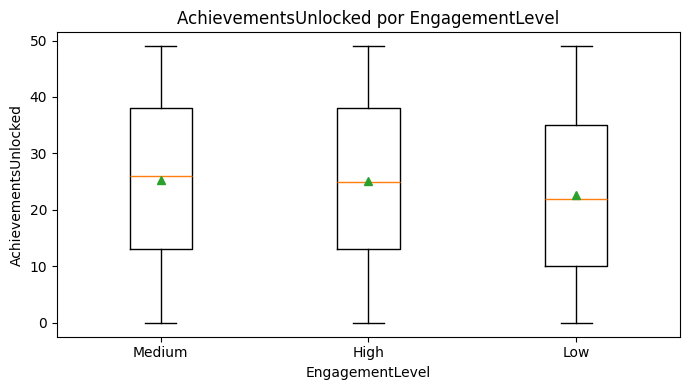

[4/6] PlayerLevel  (score=0.0054)


/tmp/ipython-input-543533916.py:136: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showmeans=True)


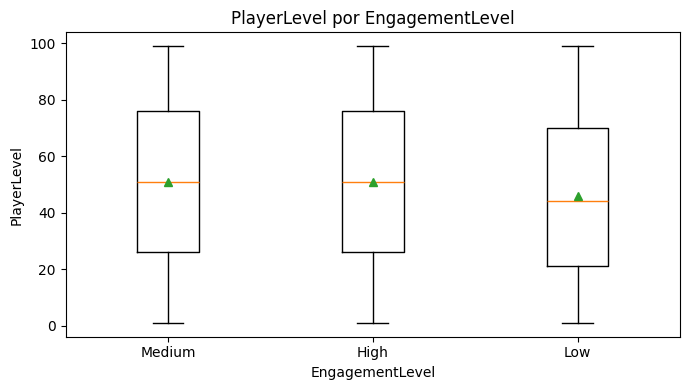

[5/6] GameGenre  (score=0.0028)


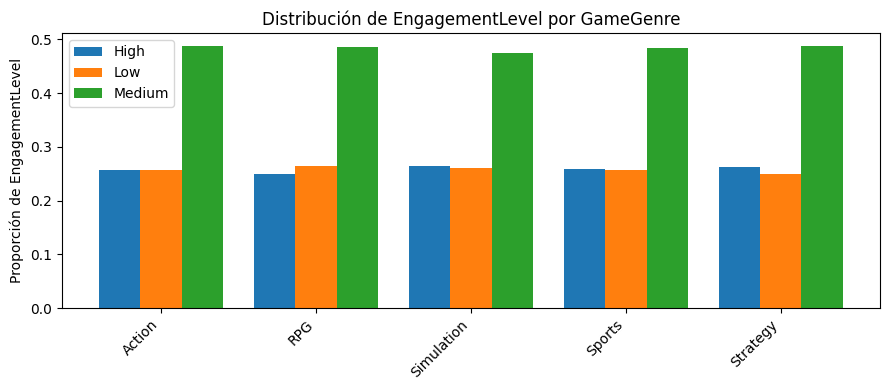

[6/6] GameDifficulty  (score=0.0015)


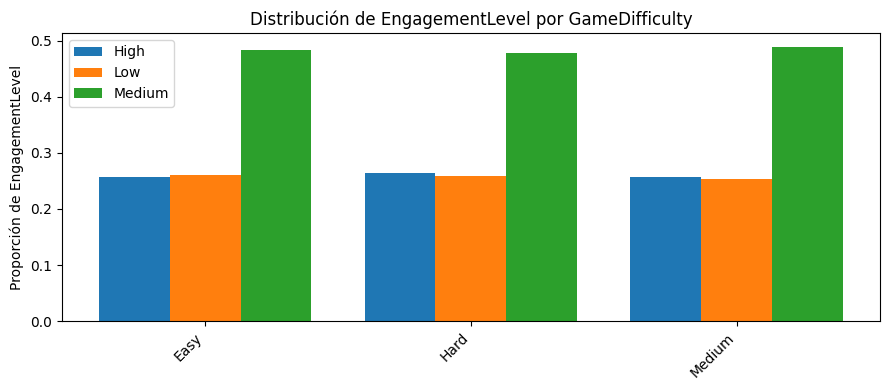

In [ ]:
# ================== Parámetros ==================
# Ajusta TARGET según tu "variable de salida". Para este dataset se usará "EngagementLevel" (High/Medium/Low).
TARGET   = "EngagementLevel"
TOP_K    = 6                   # cuántas columnas graficar tras rankear (reduce si quieres menos figuras)
MAX_CATS = 12                  # máx categorías por gráfico para evitar barras infinitas
# =================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, chi2_contingency

# --------- Cargar df si no existe ---------
try:
    df
except NameError:
    df = pd.read_csv("/mnt/data/online_gaming_insights.csv")

if TARGET not in df.columns:
    raise ValueError(f"'{TARGET}' no existe en df. Algunas columnas: {list(df.columns)[:25]}")

# --------- Detectar tipo de tarea ---------
y_raw = df[TARGET]
vals = pd.Series(y_raw.dropna().unique())

# si es claramente numérica -> regresión
if pd.api.types.is_numeric_dtype(y_raw) and vals.nunique() > 2:
    TASK = "reg"
    y = pd.to_numeric(y_raw, errors="coerce")
else:
    # clasificación (binaria o multiclase) -> trabajar como categorías
    TASK = "clf"
    y = y_raw.astype("string")

classes = y.dropna().unique().tolist()

# --------- Métricas de relación univariada ---------
def score_numeric_reg(x, y):
    """|r| de Pearson para regresión."""
    x = pd.to_numeric(x, errors="coerce")
    m = ~(x.isna() | y.isna())
    if m.sum() < 3: return 0.0
    try:
        r, _ = pearsonr(x[m], y[m])
        return float(abs(r))
    except Exception:
        return 0.0

def score_numeric_clf(x, ycat):
    """ANOVA univar: R^2 (varianza entre clases / total). Sirve para binaria y multiclase."""
    x = pd.to_numeric(x, errors="coerce")
    yc = ycat.astype("string")
    m = ~(x.isna() | yc.isna())
    if m.sum() < 3: return 0.0
    xv = x[m]; yv = yc[m]
    groups = [xv[yv==g] for g in yv.unique()]
    if len(groups) < 2: return 0.0
    xbar = xv.mean()
    ss_between = sum(len(g)*(g.mean()-xbar)**2 for g in groups)
    ss_total   = ((xv - xbar)**2).sum()
    if ss_total == 0: return 0.0
    return float(ss_between/ss_total)  # R^2 entre 0-1

def score_categ_any(x, ycat):
    """Cramér's V para tabla de contingencia. V∈[0,1]."""
    s = x.astype("string")
    yc = ycat.astype("string")
    m = ~(s.isna() | yc.isna())
    if m.sum() == 0: return 0.0
    tbl = pd.crosstab(s[m], yc[m])
    if tbl.shape[0] < 2 or tbl.shape[1] < 2: return 0.0
    chi2, _, _, _ = chi2_contingency(tbl, correction=False)
    n = tbl.values.sum()
    phi2 = chi2 / n
    r, k = tbl.shape
    # corrección de bias (Bergsma)
    phi2corr = max(0, phi2 - (k-1)*(r-1)/(n-1))
    rcorr = r - (r-1)**2/(n-1)
    kcorr = k - (k-1)**2/(n-1)
    denom = min((kcorr-1), (rcorr-1))
    if denom <= 0: return 0.0
    V = np.sqrt(phi2corr / denom)
    return float(V)

# --------- Calcular score para TODAS las columnas ---------
scores = []
for col in df.columns:
    if col == TARGET:
        continue
    s = df[col]
    try:
        if TASK == "reg":
            # target numérica
            if pd.api.types.is_numeric_dtype(s):
                sc = score_numeric_reg(s, y)
            else:
                if s.nunique(dropna=True) > 2000:
                    sc = 0.0
                else:
                    sc = score_categ_any(s, pd.cut(y, bins=5, duplicates="drop").astype("string"))
        else:
            # target categórica (binaria o multiclase)
            if pd.api.types.is_numeric_dtype(s):
                sc = score_numeric_clf(s, y)
            else:
                if s.nunique(dropna=True) > 2000:
                    sc = 0.0
                else:
                    sc = score_categ_any(s, y)
        scores.append((col, sc))
    except Exception:
        scores.append((col, 0.0))

rank = pd.DataFrame(scores, columns=["feature","score"]).sort_values("score", ascending=False)
print("TOP features por relación con la salida (score univar):")
display(rank.head(TOP_K))

tops = rank.head(TOP_K)["feature"].tolist()
print(f"Graficando {len(tops)} columnas con mayor relación con '{TARGET}' (TASK={TASK}, clases={classes if TASK=='clf' else 'N/A'}).")

# --------- Función de graficado ---------
def plot_feature_vs_target(df, col, target, max_cats=15):
    s = df[col]
    t = df[target]

    if TASK == "clf":
        # numéricas -> boxplot por clase
        if pd.api.types.is_numeric_dtype(s):
            data = []
            labels = []
            for c in pd.Series(t).astype("string").dropna().unique():
                data.append(pd.to_numeric(s[t==c], errors="coerce").dropna())
                labels.append(str(c))
            if len(data) >= 2:
                plt.figure(figsize=(7,4))
                plt.boxplot(data, labels=labels, showmeans=True)
                plt.title(f"{col} por {target}")
                plt.xlabel(target); plt.ylabel(col)
                plt.tight_layout(); plt.show()
            return
        # categóricas -> barras agrupadas: proporción por clase
        sc = s.astype("string")
        tc = t.astype("string")
        topcats = sc.value_counts().head(max_cats).index
        tmp = pd.DataFrame({col: sc, target: tc})
        tmp = tmp[tmp[col].isin(topcats)]
        ct = pd.crosstab(tmp[col], tmp[target])  # filas=categorías, cols=clases
        props = ct.div(ct.sum(axis=1), axis=0)   # proporción por categoría
        # barras agrupadas
        plt.figure(figsize=(9,4))
        x = np.arange(len(props.index))
        width = 0.8 / max(1, len(props.columns))
        for i, cls in enumerate(props.columns):
            plt.bar(x + i*width, props[cls].values, width=width, label=str(cls))
        plt.xticks(x + width*(len(props.columns)-1)/2, props.index, rotation=45, ha="right")
        plt.ylabel(f"Proporción de {target}")
        plt.title(f"Distribución de {target} por {col}")
        plt.legend()
        plt.tight_layout(); plt.show()

    else:
        # REGRESIÓN
        if pd.api.types.is_numeric_dtype(s):
            m = ~(pd.to_numeric(s, errors="coerce").isna() | pd.to_numeric(t, errors="coerce").isna())
            plt.figure(figsize=(7,4))
            plt.scatter(pd.to_numeric(s[m], errors="coerce"), pd.to_numeric(t[m], errors="coerce"), s=6, alpha=0.5)
            plt.xlabel(col); plt.ylabel(target)
            plt.title(f"{target} vs {col}")
            plt.tight_layout(); plt.show()
        else:
            sc = s.astype("string")
            topcats = sc.value_counts().head(max_cats).index
            tmp = pd.DataFrame({col: sc, target: pd.to_numeric(t, errors="coerce")})
            tmp = tmp[tmp[col].isin(topcats)]
            grp = tmp.groupby(col)[target].agg(media="mean", n="count").sort_values("media", ascending=False)
            plt.figure(figsize=(9,4))
            plt.bar(grp.index, grp["media"].values)
            plt.title(f"Media de {target} por {col}")
            plt.ylabel(f"media de {target}")
            plt.xticks(rotation=45, ha="right")
            # anotar n
            for i, (cat, row) in enumerate(grp.iterrows()):
                plt.text(i, row["media"], f"n={int(row['n'])}", ha="center", va="bottom", fontsize=8)
            plt.tight_layout(); plt.show()

# --------- Graficar ---------
for i, c in enumerate(tops, 1):
    print(f"[{i}/{len(tops)}] {c}  (score={rank.loc[rank.feature==c,'score'].values[0]:.4f})")
    try:
        plot_feature_vs_target(df, c, TARGET, MAX_CATS)
    except Exception as e:
        print(f"   (omitido: {e})")


### **Explicación de las gráficas**


***1. SessionsPerWeek por EngagementLevel***

**Tipo de gráfico:** *boxplot* (diagrama de caja)

**Cómo leerlo:**

* Cada caja representa la **distribución** del número de sesiones semanales para una categoría de *EngagementLevel* (“Low”, “Medium”, “High”).
* La **línea naranja** dentro de la caja = **mediana** (valor central).
* Los **bordes de la caja** = rango intercuartílico (50% central de los datos).
* Los **bigotes** = valores que se alejan hasta 1.5 veces el rango intercuartílico.
* Los **círculos negros** = *outliers* (jugadores con un comportamiento atípico).
* El **triángulo verde** = **media** (promedio).

**Interpretación visual:**

* En *Low*, la caja está abajo: la mayoría juega entre 0 y 5 sesiones, con mediana en ~3.
* En *Medium*, la caja está más alta (6–12 sesiones), mediana en ~9.
* En *High*, la caja está arriba (10–18 sesiones), mediana ~15.

**Conclusión:**
A medida que sube el nivel de engagement, **las cajas se desplazan hacia arriba** → los jugadores con *High Engagement* tienen más sesiones semanales.
→ **Relación directa y clara entre engagement y frecuencia de juego.**


***2. AvgSessionDurationMinutes por EngagementLevel***

**Tipo de gráfico:** *boxplot* (igual formato)

**Cómo leerlo:**

* Mismo principio: cajas comparan duración promedio de cada sesión según el nivel de engagement.
* Fíjate en:

  * **Posición vertical de las cajas:** muestra el rango de minutos.
  * **Altura de la caja:** dispersión (qué tan variados son los jugadores).
  * **Outliers negros abajo:** jugadores de *High* con sesiones muy cortas, fuera de la tendencia.

**Interpretación visual:**

* *Low:* caja más baja (30–80 minutos aprox.), mediana ~55.
* *Medium:* intermedia (50–130 min), mediana ~90.
* *High:* más alta (90–175 min), mediana ~130.

**Conclusión:**
La **altura de las cajas crece con el engagement**. Los jugadores más comprometidos **pasan más minutos por sesión**.
El pequeño grupo de *outliers* sugiere que algunos *High* juegan con sesiones muy cortas, pero son excepciones.


***3. AchievementsUnlocked por EngagementLevel***

**Tipo de gráfico:** *boxplot*

**Cómo leerlo:**

* Eje Y: número de logros desbloqueados (0–50).
* Eje X: nivel de engagement.
* Observa el **centro y tamaño** de las cajas para ver si hay desplazamiento o dispersión.

**Interpretación visual:**

* Las tres cajas están a alturas similares, pero *Low* tiene la caja ligeramente más baja (mediana ~22).
* *Medium* y *High* tienen medianas algo más altas (~26–28) y un rango similar.

**Conclusión:**
Hay una **tendencia leve a más logros en jugadores más comprometidos**, pero no es una diferencia fuerte visualmente (las cajas se solapan bastante).
→ Indica una **relación débil o moderada** entre logros y engagement.


***4. PlayerLevel por EngagementLevel***

**Tipo de gráfico:** *boxplot*

**Cómo leerlo:**

* Eje Y: nivel del jugador (1–100).
* Eje X: categorías de engagement.
* Se observa el centro (mediana) y la amplitud.

**Interpretación visual:**

* Las tres cajas cubren casi todo el rango (0–100), indicando gran variabilidad.
* *High* y *Medium* tienen medianas más altas (~50–55), mientras *Low* está algo más abajo (~45).
* No hay outliers extremos.

**Conclusión:**
Aunque las distribuciones se parecen, **los jugadores con más engagement tienden a tener niveles más altos**.
→ Indica una **correlación leve**: jugar más se traduce en progresar más.


***5. Distribución de EngagementLevel por GameGenre***


**Tipo de gráfico:** *barras agrupadas (proporciones)*

**Cómo leerlo:**

* Eje X: géneros de juego (Action, RPG, Simulation, etc.).
* Eje Y: proporción dentro de cada género (suma = 1 por género).
* Cada barra de color representa un nivel de engagement:

  * Azul: High
  * Naranja: Low
  * Verde: Medium
* Se comparan las alturas dentro de cada grupo.

**Interpretación visual:**

* En todos los géneros, la barra verde (*Medium*) domina (~0.48).
* Azul y naranja (High/Low) están casi iguales (~0.25 cada uno).
* No hay género con una proporción excepcionalmente alta en *High*.

**Conclusión:**
El **género del juego no tiene impacto claro en el engagement**.
Los jugadores mantienen niveles parecidos sin importar si el juego es de acción, estrategia o simulación.


***6. Distribución de EngagementLevel por GameDifficulty***

**Tipo de gráfico:** *barras agrupadas (proporciones)*

**Cómo leerlo:**

* Eje X: niveles de dificultad (Easy, Medium, Hard).
* Eje Y: proporción de jugadores por engagement dentro de cada dificultad.
* Igual que el anterior, cada color = nivel de engagement.

**Interpretación visual:**

* En todas las dificultades, *Medium* (verde) es mayoritaria (~0.48).
* *High* y *Low* mantienen proporciones muy parecidas.
* No hay patrón en que la dificultad suba o baje con el engagement.

**Conclusión:**
No se observa relación entre **la dificultad del juego y el engagement**.
Es decir, el nivel de dificultad **no determina qué tan comprometido está el jugador**.



## *¿Qué hacer con los nulos?*

El código:
* Define parámetros: umbral para drop por nulos, lista de “tokens” a tratar como nulos y columnas donde el cero se considera nulo.
* No modifica el DataFrame original; trabaja en modo diagnóstico.
* Construye una “máscara de nulos extendida” por columna: NaN reales, tokens vacíos/NA/unknown y, opcionalmente, ceros en columnas indicadas.
* Calcula por columna el número y porcentaje de nulos usando esa máscara.
* Sugiere columnas a eliminar si su porcentaje de nulos supera el umbral.
* Genera un plan de imputación solo para columnas con nulos que no fueron sugeridas para eliminar: mediana para numéricas, moda para categóricas; incluye nombre del flag `__was_null`.
* Calcula también el número y porcentaje de ceros en columnas numéricas para el análisis de “% 0’s”.
* Devuelve: el mismo DataFrame, lista de columnas sugeridas para drop, plan de imputación, resumen de nulos y resumen de ceros.
* Es robusto cuando no hay nulos: no falla y entrega tablas vacías con columnas definidas.




In [ ]:
# ================== Parámetros ==================
NULL_COL_DROP_THRESH = 0.60
TOKENS_COMO_NULO = ["", " ", "na", "n/a", "none", "null", "nan", "unknown", "desconocido"]
ZEROS_COMO_NULO_EN = []   # ej: ["InGamePurchases"]
# =================================================

import pandas as pd
import numpy as np

def imputar_nulos_seguro_plus(df_in: pd.DataFrame,
                              col_drop_thresh: float = 0.6,
                              tokens_como_nulo=None,
                              zeros_como_nulo_en=None):
    if tokens_como_nulo is None:
        tokens_como_nulo = []
    if zeros_como_nulo_en is None:
        zeros_como_nulo_en = []

    dfc = df_in  # no se modifica

    # --- máscara de nulos "extendidos" por columna ---
    null_masks = {}
    for c in dfc.columns:
        s = dfc[c]
        base_null = s.isna()

        token_null = pd.Series(False, index=s.index)
        if s.dtype == "object" or pd.api.types.is_string_dtype(s):
            s_str = s.astype("string").str.strip().str.lower()
            token_null = s_str.isin([t.strip().lower() for t in tokens_como_nulo])

        zero_null = pd.Series(False, index=s.index)
        if c in zeros_como_nulo_en:
            s_num = pd.to_numeric(s, errors="coerce")
            zero_null = s_num.fillna(np.inf).eq(0)

        null_masks[c] = (base_null | token_null | zero_null)

    # % nulos por columna
    nulos_pct = pd.Series({c: mask.mean() for c, mask in null_masks.items()})
    nulos_cnt = pd.Series({c: int(mask.sum()) for c, mask in null_masks.items()})
    resumen_nulos = (
        pd.DataFrame({"n_nulos": nulos_cnt, "pct_nulos": nulos_pct})
          .sort_values("pct_nulos", ascending=False)
    )

    # sugerencia de drop
    drop_cols = resumen_nulos[resumen_nulos["pct_nulos"] > col_drop_thresh].index.tolist()

    # plan de imputación (solo si hay nulos y no están para drop)
    plan_rows = []
    for c in dfc.columns:
        if c in drop_cols:
            continue
        n_na = int(nulos_cnt.get(c, 0))
        pct_na = float(nulos_pct.get(c, 0.0) * 100)
        if n_na > 0:
            tipo = str(dfc[c].dtype)
            if pd.api.types.is_numeric_dtype(dfc[c]):
                estrategia = "mediana"; detalle = "numérica → mediana"
            else:
                estrategia = "moda";    detalle = "categórica → moda"
            plan_rows.append({
                "columna": c,
                "tipo_dato": tipo,
                "n_nulos": n_na,
                "pct_nulos": round(pct_na, 2),
                "estrategia_imputacion": estrategia,
                "flag_que_se_crearia": f"{c}__was_null",
                "detalle": detalle
            })

    # asegurar columnas aunque esté vacío
    plan_imputacion = pd.DataFrame(plan_rows, columns=[
        "columna","tipo_dato","n_nulos","pct_nulos",
        "estrategia_imputacion","flag_que_se_crearia","detalle"
    ])
    if not plan_imputacion.empty:
        plan_imputacion = plan_imputacion.sort_values("pct_nulos", ascending=False).reset_index(drop=True)

    # % ceros en numéricas (para el paso de "0's")
    zeros_rows = []
    for c in dfc.columns:
        s = pd.to_numeric(dfc[c], errors="coerce")
        if pd.api.types.is_numeric_dtype(s):
            m = s.eq(0) & ~s.isna()
            zeros_rows.append({
                "columna": c,
                "n_ceros": int(m.sum()),
                "pct_ceros": float((m.mean() if len(s)>0 else 0)*100)
            })
    resumen_ceros = (
        pd.DataFrame(zeros_rows)
          .sort_values("pct_ceros", ascending=False)
          .reset_index(drop=True)
    )

    return dfc, drop_cols, plan_imputacion, resumen_nulos, resumen_ceros

# Uso
df_imputed, cols_nulos_dropeadas, plan_imputacion, resumen_nulos, resumen_ceros = imputar_nulos_seguro_plus(
    df,
    col_drop_thresh=NULL_COL_DROP_THRESH,
    tokens_como_nulo=TOKENS_COMO_NULO,
    zeros_como_nulo_en=ZEROS_COMO_NULO_EN
)

print("Columnas sugeridas para eliminar por nulos altos:", cols_nulos_dropeadas)
display(plan_imputacion.head(20))
display(resumen_nulos.head(10))
display(resumen_ceros.head(10))


Columnas sugeridas para eliminar por nulos altos: []


,columna,tipo_dato,n_nulos,pct_nulos,estrategia_imputacion,flag_que_se_crearia,detalle


,n_nulos,pct_nulos
PlayerID,0,0.0
Age,0,0.0
Gender,0,0.0
Location,0,0.0
GameGenre,0,0.0
PlayTimeHours,0,0.0
InGamePurchases,0,0.0
GameDifficulty,0,0.0
SessionsPerWeek,0,0.0
AvgSessionDurationMinutes,0,0.0


,columna,n_ceros,pct_ceros
0,InGamePurchases,31993,79.914573
1,SessionsPerWeek,1967,4.913324
2,AchievementsUnlocked,810,2.023280
3,Age,0,0.000000
4,PlayerID,0,0.000000
5,GameGenre,0,0.000000
6,Location,0,0.000000
7,Gender,0,0.000000
8,PlayTimeHours,0,0.000000
9,GameDifficulty,0,0.000000


### **Explicación de resultados**

El resultado muestra que **no existen valores nulos** en ninguna columna del conjunto de datos, por lo que no es necesario aplicar imputaciones ni eliminar variables por alta proporción de datos faltantes. Sin embargo, en la revisión de ceros se observa que la variable **InGamePurchases** tiene un 79,9 % de ceros, lo que indica un fuerte desbalance entre jugadores que no compran frente a los que sí. En menor medida, **SessionsPerWeek** y **AchievementsUnlocked** presentan bajos porcentajes de ceros (4,9 % y 2 %), que no representan un problema. En conclusión, la base está completa en términos de nulos, pero conviene tener en cuenta el **desbalance de ceros en InGamePurchases** para futuros análisis.


## *¿Qué hacer con los 0's? (Si es que el 0 significa que es un dato faltante)*

El código:

* No modifica el DataFrame original; trabaja en diagnóstico.
* Recibe una lista de columnas numéricas candidatas a tratar 0 como faltante.
* Si no hay columnas indicadas, devuelve planes vacíos y el mismo DataFrame.
* Genera un plan de ceros por columna: conteo, porcentaje y sugerencia textual.
* Simula en una copia temporal recodificar 0→NaN solo en columnas válidas.
* Llama a `imputar_nulos_seguro` en modo diagnóstico sobre la copia para obtener:

  * Columnas sugeridas para eliminar por alto porcentaje de nulos.
  * Plan de imputación propuesto para el resto.
* Devuelve: el mismo DataFrame de entrada, `plan_ceros` y `plan_imputacion` simulada.
* Imprime columnas evaluadas, sugerencias de drop y muestra los primeros registros de ambos planes.




In [ ]:
ZEROS_AS_NULL = []  # e.g., ["someNumericCol1", "someNumericCol2"]

import numpy as np
import pandas as pd

def tratar_ceros_como_nulos(df_in: pd.DataFrame, cols: list[str], col_drop_thresh=0.6):
    """
    Versión 'solo sugerencia':
    - NO modifica df_in.
    - Reporta cuántos ceros hay en cada columna objetivo y su %.
    - Simula (en una copia temporal) recodificar 0->NaN y llama a 'imputar_nulos_seguro'
      para obtener el plan de imputación posterior (sin aplicar cambios reales).
    - Devuelve: (df_in, plan_ceros, plan_imputacion_simulada)
    """
    if not cols:
        print("No se indicó ninguna columna para tratar ceros como nulos.")
        # planes vacíos para mantener misma interfaz ampliada
        return df_in, pd.DataFrame(columns=["columna","ceros","pct_ceros","sugerencia"]), pd.DataFrame()

    # 1) Resumen de ceros por columna (diagnóstico)
    plan_rows = []
    for c in cols:
        if c in df_in.columns and pd.api.types.is_numeric_dtype(df_in[c]):
            zeros = int((df_in[c] == 0).sum())
            pct0  = float(((df_in[c] == 0).mean() * 100))
            # Sugerencia base (ajusta tu umbral si quieres)
            sug = ("Revisar dominio: ¿0 = faltante? -> recodificar a NaN y luego imputar"
                   if pct0 >= 70 else
                   "Posible valor real: confirmar contexto (quizá dejar tal cual)")
            plan_rows.append({"columna": c, "ceros": zeros, "pct_ceros": round(pct0, 2), "sugerencia": sug})
        else:
            plan_rows.append({"columna": c, "ceros": np.nan, "pct_ceros": np.nan,
                              "sugerencia": "Columna no numérica o no existe en df"})
    plan_ceros = pd.DataFrame(plan_rows).sort_values("pct_ceros", ascending=False, na_position="last").reset_index(drop=True)

    # 2) Simulación en copia TEMPORAL (no se devuelve): 0 -> NaN solo en cols válidas
    df_temp = df_in.copy()
    valid_cols = [c for c in cols if c in df_in.columns and pd.api.types.is_numeric_dtype(df_in[c])]
    for c in valid_cols:
        df_temp.loc[df_temp[c] == 0, c] = np.nan

    # 3) Obtener plan de imputación (diagnóstico) usando tu función de nulos (también modo diagnóstico)
    #    Nota: 'imputar_nulos_seguro' debe ser la versión que NO modifica datos.
    _, drop_cols_sugeridas, plan_imputacion = imputar_nulos_seguro(df_temp, col_drop_thresh)

    # 4) Mensajes informativos
    print(f"Columnas numéricas evaluadas para 0->NaN: {len(valid_cols)} (muestra): {valid_cols[:10]}")
    if len(drop_cols_sugeridas):
        print(f"Sugerencia de DROP por nulos altos tras recodificar 0->NaN: {len(drop_cols_sugeridas)} (muestra): {drop_cols_sugeridas[:10]}")
    else:
        print("Sin columnas sugeridas para DROP por nulos altos tras recodificar 0->NaN.")

    # Devuelve el MISMO df, más los planes
    return df_in, plan_ceros, plan_imputacion

# === Uso (df_ceros_tratados será igual a df; no se altera nada) ===
df_ceros_tratados, plan_ceros, plan_imputacion_ceros = tratar_ceros_como_nulos(
    df, ZEROS_AS_NULL, NULL_COL_DROP_THRESH
)

print("Shape (sin cambios):", df_ceros_tratados.shape)
print("\nPlan de CEROS (diagnóstico):")
display(plan_ceros.head(20))
print("\nPlan de IMPUTACIÓN tras 0->NaN (diagnóstico):")
display(plan_imputacion_ceros.head(20))


No se indicó ninguna columna para tratar ceros como nulos.
Shape (sin cambios): (40034, 13)

Plan de CEROS (diagnóstico):


,columna,ceros,pct_ceros,sugerencia



Plan de IMPUTACIÓN tras 0->NaN (diagnóstico):


""


### **Explicación de resultados**

El resultado indica que **no se definió ninguna columna para considerar los ceros como valores nulos**, por lo tanto, la estructura del conjunto de datos no cambió (mantiene 40.034 filas y 13 columnas). En el diagnóstico no se identifican variables que requieran tratamiento especial por ceros, ni se aplicó imputación posterior de datos. En resumen, no fue necesario reemplazar ceros por valores faltantes ni realizar ajustes, ya que el análisis determinó que los ceros presentes son **valores válidos y propios del comportamiento de las variables**, no ausencias de información.


## *¿Qué hacer con los outliers?*

El código:
Aquí tienes el resumen en ideas cortas, sin emojis:

* No modifica el DataFrame; funciona en modo diagnóstico.
* Calcula límites IQR seguros por columna numérica: [Q1 − k·IQR, Q3 + k·IQR].
* Cuenta outliers “antes” de winsorizar; “después” queda igual porque no aplica clip.
* Estima el porcentaje de outliers por columna.
* Genera una sugerencia según el porcentaje de outliers:

  * Bajo: OK.
  * Moderado: considerar winsorizar a los límites IQR o revisar dominio.
  * Alto: considerar winsorizar/transformar y revisar calidad de datos.
* Devuelve el mismo DataFrame y un resumen con límites, conteos, porcentaje y sugerencia.
* Muestra el top de columnas con más outliers “antes” (no se aplicó clip).



In [ ]:
def limites_iqr_seguro(s: pd.Series, k=1.5):
    s = pd.to_numeric(s, errors="coerce").dropna()
    if len(s) < 2:
        return (s.min() if len(s) else 0), (s.max() if len(s) else 0)
    q1, q3 = s.quantile([0.25, 0.75])
    iqr = q3 - q1
    if iqr == 0 or pd.isna(iqr):
        return float(q1), float(q3)
    return float(q1 - k*iqr), float(q3 + k*iqr)

def winsorizar_iqr(df_in: pd.DataFrame, k=1.5):
    """
    Versión 'solo sugerencia':
    - NO modifica df_in (no aplica clip).
    - Calcula límites IQR y outliers 'antes'.
    - Devuelve el MISMO df de entrada y un resumen con sugerencias.
    """
    dfc = df_in  # << no copiamos ni alteramos
    num_cols = dfc.select_dtypes(include=[np.number]).columns
    resumen = []
    n_rows = len(dfc)

    for c in num_cols:
        lo, hi = limites_iqr_seguro(dfc[c], k)
        x = pd.to_numeric(dfc[c], errors="coerce")
        mask_out = (x < lo) | (x > hi)
        antes = int(mask_out.sum())
        # como NO clippeamos, los 'despues' se quedan iguales a 'antes'
        despues = antes

        out_pct = (antes / n_rows * 100) if n_rows else 0.0
        # Sugerencia simple según % de outliers
        if out_pct < 1.0:
            sug = "OK / outliers bajos"
        elif out_pct < 5.0:
            sug = f"Sugerido: winsorizar a [{round(lo,3)}, {round(hi,3)}] (1.5*IQR) o revisar dominio"
        else:
            sug = f"Alto % outliers ({out_pct:.2f}%): considerar winsorizar/transformar (log) y validar calidad de datos"

        resumen.append((c, lo, hi, int(antes), int(despues), round(out_pct, 2), sug))

    res_df = pd.DataFrame(
        resumen,
        columns=["columna","lim_inf","lim_sup","outliers_antes","outliers_despues","outliers_pct","sugerencia"]
    )
    return dfc, res_df

# Base: usa df_imputed (o df_ceros_tratados si aplicaste paso 5)
base_out = df_imputed
df_wins, resumen_out = winsorizar_iqr(base_out, k=1.5)

print("Top variables con más outliers (ANTES; no se ha aplicado clip):")
display(resumen_out.sort_values("outliers_antes", ascending=False).head(15))


Top variables con más outliers (ANTES; no se ha aplicado clip):


,columna,lim_inf,lim_sup,outliers_antes,outliers_despues,outliers_pct,sugerencia
3,InGamePurchases,0.000000,0.000000,8041,8041,20.09,Alto % outliers (20.09%): considerar winsoriza...
0,PlayerID,-11016.500000,69049.500000,0,0,0.00,OK / outliers bajos
1,Age,-4.000000,68.000000,0,0,0.00,OK / outliers bajos
2,PlayTimeHours,-11.776995,35.808327,0,0,0.00,OK / outliers bajos
4,SessionsPerWeek,-11.000000,29.000000,0,0,0.00,OK / outliers bajos
5,AvgSessionDurationMinutes,-75.500000,264.500000,0,0,0.00,OK / outliers bajos
6,PlayerLevel,-48.500000,147.500000,0,0,0.00,OK / outliers bajos
7,AchievementsUnlocked,-25.500000,74.500000,0,0,0.00,OK / outliers bajos


### **Explicación de resultados**

La tabla muestra los límites inferior y superior calculados con el método IQR para detectar valores atípicos en cada variable numérica. En este caso, todas las variables se encuentran dentro de sus rangos normales, excepto **InGamePurchases**, que presenta un 20,09 % de valores fuera del rango, aunque no son errores sino la clase minoritaria de jugadores que sí realizan compras. Por tanto, no se requiere eliminar ni recortar datos; solo reconocer que esa variable está desbalanceada, mientras que las demás no presentan outliers significativos.


## *¿Qué hacer con varianzas?*

El código:
* No modifica el DataFrame; opera en modo diagnóstico.
* Detecta baja varianza:

  * Numéricas: candidato a eliminar si tienen un único valor o desviación estándar < `STD_MIN`.
  * Categóricas: candidato a eliminar si una categoría domina ≥ `CONST_THRESH`.
* Calcula métricas por columna:

  * Numéricas: número de únicos (`n_unicos`) y desviación estándar (`std_num`).
  * Categóricas: proporción de la categoría dominante (`dom_cat`) y número de únicos.
* Construye un reporte con métricas y una sugerencia por columna (OK o CANDIDATA a eliminar).
* Devuelve: el mismo DataFrame, la lista deduplicada y ordenada de columnas sugeridas para eliminar, y el reporte detallado.
* Muestra tamaño del DataFrame sin cambios, lista de candidatas (muestra) y las primeras filas del reporte.


In [ ]:

CONST_THRESH = 0.98  # categóricas: si la categoría mayoritaria ≥98% (sugerida para drop)
STD_MIN = 1e-8       # numéricas: std muy baja ~ constante (sugerida para drop)

def eliminar_baja_varianza(df_in: pd.DataFrame, const_thresh=0.98, std_min=1e-8):
    """
    Versión 'solo sugerencia':
    - NO modifica df_in.
    - Identifica columnas con baja varianza (numéricas ~constantes, categóricas dominantes).
    - Devuelve: (df_in, drop_cols_sugeridas, reporte_con_métricas_y_sugerencia)
    """
    dfc = df_in  # << no copiamos ni alteramos
    drop_cols = []
    rows = []

    # Numéricas: std baja o único valor
    num_cols = dfc.select_dtypes(include=[np.number]).columns
    for c in num_cols:
        s = pd.to_numeric(dfc[c], errors="coerce").dropna()
        nunq = int(s.nunique())
        stdv = float(s.std()) if len(s) > 1 else 0.0
        if nunq <= 1 or stdv < std_min:
            drop_cols.append(c)
            sug = "Baja varianza (constante/≈constante): CANDIDATA a eliminar"
        else:
            sug = "OK"
        rows.append({
            "columna": c, "tipo": "numerica",
            "n_unicos": nunq, "std_num": stdv,
            "dom_cat": np.nan, "umbral_dom": const_thresh,
            "sugerencia": sug
        })

    # Categóricas: categoría dominante
    cat_cols = dfc.select_dtypes(exclude=[np.number]).columns
    for c in cat_cols:
        vc = dfc[c].value_counts(dropna=False, normalize=True)
        dom = float(vc.iloc[0]) if not vc.empty else 1.0
        nunq = int(dfc[c].nunique(dropna=False))
        if dom >= const_thresh:
            drop_cols.append(c)
            sug = f"Cuasi-constante (domina {dom:.2%}): CANDIDATA a eliminar"
        else:
            sug = "OK"
        rows.append({
            "columna": c, "tipo": "categorica",
            "n_unicos": nunq, "std_num": np.nan,
            "dom_cat": dom, "umbral_dom": const_thresh,
            "sugerencia": sug
        })

    reporte = pd.DataFrame(rows)
    # ordenar: primero las problemáticas
    reporte["flag_problem"] = (
        ((reporte["tipo"]=="numerica") & ((reporte["n_unicos"]<=1) | (reporte["std_num"].fillna(1) < std_min))) |
        ((reporte["tipo"]=="categorica") & (reporte["dom_cat"].fillna(0) >= const_thresh))
    )
    reporte = reporte.sort_values(
        ["flag_problem","tipo","columna"],
        ascending=[False, True, True]
    ).drop(columns="flag_problem").reset_index(drop=True)

    # Devolvemos el MISMO df, más las sugerencias
    return dfc, sorted(set(drop_cols)), reporte

# === Uso (diagnóstico, sin cambios) ===
df_final, cols_baja_var, var_report = eliminar_baja_varianza(df_wins, CONST_THRESH, STD_MIN)

print("Shape (sin cambios):", df_final.shape)
print(f"Columnas 'CANDIDATA a eliminar' por baja varianza: {len(cols_baja_var)} (muestra): {cols_baja_var[:15]}")
display(var_report.head(20))


Shape (sin cambios): (40034, 13)
Columnas 'CANDIDATA a eliminar' por baja varianza: 0 (muestra): []


,columna,tipo,n_unicos,std_num,dom_cat,umbral_dom,sugerencia
0,EngagementLevel,categorica,3,NaN,0.483939,0.98,OK
1,GameDifficulty,categorica,3,NaN,0.499950,0.98,OK
2,GameGenre,categorica,5,NaN,0.201029,0.98,OK
3,Gender,categorica,2,NaN,0.598466,0.98,OK
4,Location,categorica,4,NaN,0.399660,0.98,OK
5,AchievementsUnlocked,numerica,50,14.430726,NaN,0.98,OK
6,Age,numerica,35,10.043227,NaN,0.98,OK
7,AvgSessionDurationMinutes,numerica,170,49.011375,NaN,0.98,OK
8,InGamePurchases,numerica,2,0.400644,NaN,0.98,OK
9,PlayTimeHours,numerica,40034,6.914638,NaN,0.98,OK


### **Explicación de resultados**

Estos resultados corresponden al análisis de **varianza por columna**, que sirve para identificar variables con **muy poca variabilidad** (es decir, casi todos los registros tienen el mismo valor), las cuales suelen ser poco útiles para el análisis o los modelos predictivos. En este caso, la tabla muestra que **ninguna columna tiene baja varianza**, por lo tanto, no se elimina ninguna variable.
Cada columna incluye su tipo (numérica o categórica), el número de valores únicos y, en el caso de las numéricas, la desviación estándar (`std_num`), que indica cuán dispersos están los datos. Para las categóricas, `dom_cat` mide la proporción de la categoría dominante y se compara con el `umbral_dom` (0.98).
Todas las columnas tienen varianza o diversidad suficiente, por lo que la **sugerencia es “OK”**: significa que **todas las variables aportan información útil y ninguna es redundante ni constante**.


## *Variables correlacionadas*

El código:
* Define parámetros: umbral de correlación (`THRESH`) y columnas protegidas (`PROTECT`).
* Selecciona solo variables numéricas y descarta columnas constantes (sin variación).
* Calcula la **matriz de correlación de Pearson** entre numéricas.
* Dibuja un **mapa de calor** con `matplotlib` para visualizar la correlación.
* Extrae pares de variables con **|r| ≥ umbral** usando el triángulo superior de la matriz.
* Para cada par, decide qué borrar con un criterio de **redundancia promedio**: elimina la variable con mayor media de |correlación| respecto a todas las demás.
* Respeta columnas **protegidas**: si un par las incluye, se elimina la otra.
* Devuelve un `df_reduced` sin las variables redundantes, la lista de columnas eliminadas, los pares detectados y la matriz de correlación.
* Imprime resumen: columnas eliminadas y shapes original vs. reducido.


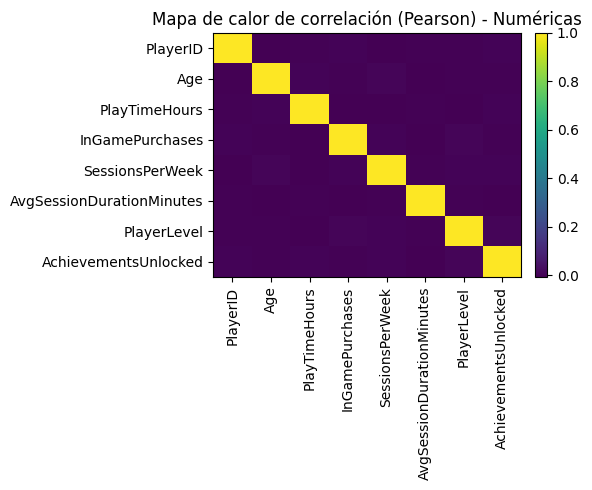

Columnas eliminadas por alta correlación: []
Shape original: (40034, 13) -> reducido: (40034, 13)


In [ ]:
# ==================== Correlación y reducción sin releer ====================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -------- Parámetros editables --------
THRESH  = 0.90                 # umbral de "muy correlacionadas"
PROTECT = {"id","playerid"}    # columnas que NO quieres eliminar (case-insensitive)
# -------------------------------------

def correlacion_y_reduccion(df, thresh=0.90, protect=None, plot=True):
    if protect is None:
        protect = set()
    protect = {p.lower() for p in protect}

    # 1) numéricas y exclusión de constantes
    num_df = df.select_dtypes(include=[np.number]).copy()
    const_cols = [c for c in num_df.columns if num_df[c].nunique(dropna=True) <= 1]
    num_df = num_df.drop(columns=const_cols, errors="ignore")

    if num_df.shape[1] < 2:
        print("No hay suficientes numéricas para correlación.")
        return df.copy(), [], pd.DataFrame(), pd.DataFrame()

    # 2) correlación (Pearson)
    corr = num_df.corr(numeric_only=True)

    # 3) heatmap (matplotlib puro)
    if plot:
        plt.figure(figsize=(max(6, 0.6*len(corr.columns)), max(5, 0.6*len(corr.columns))))
        im = plt.imshow(corr, interpolation="nearest", aspect="auto")
        plt.colorbar(im, fraction=0.046, pad=0.04)
        plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
        plt.yticks(range(len(corr.index)), corr.index)
        plt.title("Mapa de calor de correlación (Pearson) - Numéricas")
        plt.tight_layout()
        plt.show()

    # 4) pares con |r| >= umbral (triángulo superior)
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    pairs = upper.stack().rename("corr").abs().sort_values(ascending=False)
    high_pairs = pairs[pairs >= thresh].reset_index()
    high_pairs.columns = ["feat_i", "feat_j", "corr_abs"]

    # 5) criterio de eliminación: quitar la más "redundante" (mayor media de |r| con el resto)
    to_drop = set()
    if not high_pairs.empty:
        abs_corr = corr.abs()
        avg_redundancy = abs_corr.mean()

        protected = {c for c in num_df.columns if c.lower() in protect}

        for _, row in high_pairs.iterrows():
            i, j = row["feat_i"], row["feat_j"]
            if i in to_drop or j in to_drop:
                continue
            if i in protected and j not in protected:
                to_drop.add(j); continue
            if j in protected and i not in protected:
                to_drop.add(i); continue
            drop_candidate = i if avg_redundancy[i] >= avg_redundancy[j] else j
            to_drop.add(drop_candidate)

    # 6) df reducido (mantiene no-numéricas)
    df_reduced = df.drop(columns=list(to_drop), errors="ignore")
    return df_reduced, sorted(to_drop), high_pairs, corr

# ---- Ejecutar sobre el df ya existente ----
df_reduced, dropped_cols, high_pairs, corr = correlacion_y_reduccion(
    df,
    thresh=THRESH,
    protect=PROTECT,
    plot=True
)

print("Columnas eliminadas por alta correlación:", dropped_cols)
print("Shape original:", df.shape, "-> reducido:", df_reduced.shape)
# =============================================================================


### **Explicación de resultados**

El mapa de calor muestra que las variables numéricas tienen **correlaciones muy bajas entre sí**, lo que indica que son independientes y no existe redundancia en la información. Solo la diagonal aparece en amarillo porque cada variable está correlacionada consigo misma. Por ello, **no se eliminaron columnas**, confirmando que no hay problemas de multicolinealidad en los datos.


## *Clusters*

El código hace:
1. Importaciones

  * PCA para reducir dimensión, MiniBatchKMeans para clústeres rápidos, silueta para evaluar K, generador aleatorio para muestrear.

2. Parámetros de velocidad

* `MAX_SAMPLE_SIL`: límite de filas para calcular silueta.
* `RANGO_K`: valores de K a evaluar.
* `MB_SIZE`: tamaño de lote para MiniBatchKMeans.

3. Ajuste del One-Hot Encoder

* Agrupa categorías raras (`min_frequency=0.01`) e ignora desconocidas para reducir columnas y acelerar.

4. Recalcular matriz de features

* `pre.fit_transform(X)` produce `X_proc`.
* Reconstruye `feature_names` según numéricas y dummies creadas.

5. PCA

* Reduce dimensión manteniendo ~90% de varianza (`n_components=0.90`) para acelerar K-means en `X_red`.

6. Método del codo

* Entrena MiniBatchKMeans para cada K en `RANGO_K`.
* Guarda `inertia_` y grafica K vs inercia para ver el “codo”.

7. Silueta en submuestra

* Toma una muestra aleatoria de tamaño `MAX_SAMPLE_SIL`.
* Para cada K, calcula labels en la muestra y su silueta.
* Elige `best_k` como el K con mayor silueta y lo grafica.

8. Entrenamiento final

* Ajusta MiniBatchKMeans con `best_k` sobre todo `X_red`.
* Obtiene `labels` y los añade a una copia del dataframe original (`df_clusters["cluster"]`).

9. Perfilado de clústeres

* Convierte `X_red` a DataFrame, calcula medias globales y desviaciones.
* Para cada clúster:

  * Media por componente PCA.
  * Importancia relativa como |z| de esa media frente al global (componentes más distintivas).
  * Medias de variables numéricas originales para interpretar en unidades reales.
  * Distribución del `TARGET` si existe.

10. Salida

* Imprime un resumen por clúster: tamaño, componentes PCA más distintivas, top de medias numéricas originales y distribución del TARGET.
* `df_clusters` queda listo con la etiqueta `cluster` para análisis posteriores o visualización.


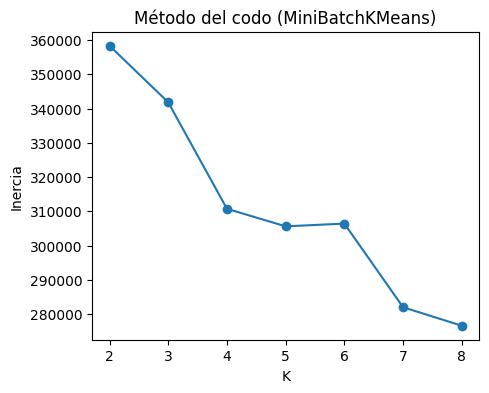

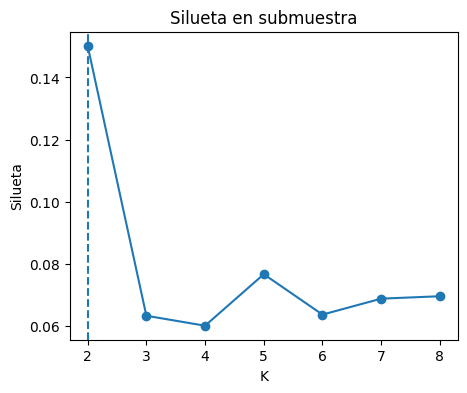

K óptimo (silueta submuestreada): 2 | sil=0.1502

=== Resumen de clústeres (rápido) ===

--- Cluster 0 ---
Tamaño: 20155
Componentes PCA más distintivas (|z|):
  - 6: |z|=0.507
  - 2: |z|=0.412
  - 0: |z|=0.39
  - 7: |z|=0.268
  - 5: |z|=0.215
  - 1: |z|=0.124

Medias de variables numéricas originales (top):
PlayerID                     28085.545125
AvgSessionDurationMinutes       94.200149
PlayerLevel                     49.693972
Age                             33.202580
AchievementsUnlocked            24.763880
SessionsPerWeek                  9.945125
PlayTimeHours                    6.240543
InGamePurchases                  0.206351

Distribución del TARGET:
EngagementLevel
Medium    0.488
High      0.272
Low       0.240

--- Cluster 1 ---
Tamaño: 19879
Componentes PCA más distintivas (|z|):
  - 6: |z|=0.514
  - 2: |z|=0.417
  - 0: |z|=0.396
  - 7: |z|=0.272
  - 5: |z|=0.218
  - 1: |z|=0.125

Medias de variables numéricas originales (top):
PlayerID                     29960.380251

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.utils import check_random_state

# ==== 1) Ajustes de velocidad ====
MAX_SAMPLE_SIL = 5000        # filas para silueta (submuestra)
RANGO_K = range(2, 9)        # evalúa menos K
MB_SIZE = 2048               # batch para MiniBatchKMeans

# Reajustar OneHot para agrupar categorías raras (si hay categóricas)
if len(cat_cols) > 0:
    pre.named_transformers_['cat'].set_params(
        ohe__min_frequency=0.01,     # agrupa categorías <1%
        ohe__handle_unknown="ignore",
        ohe__sparse_output=False
    )

# Recalcular X_proc y nombres si cambió el OHE
X_proc = pre.fit_transform(X)
feature_names = []
feature_names += num_cols
if len(cat_cols) > 0:
    ohe = pre.named_transformers_['cat'].named_steps['ohe']
    feature_names += ohe.get_feature_names_out(cat_cols).tolist()

# ==== 2) PCA para acelerar (mantén ~90% de var. explicada) ====
pca = PCA(n_components=0.90, svd_solver="full", random_state=42)
X_red = pca.fit_transform(X_proc)

# ==== 3) Codo (inercia) con MiniBatchKMeans ====
inertias = {}
for k in RANGO_K:
    mbk = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=MB_SIZE, n_init=5)
    mbk.fit(X_red)
    inertias[k] = mbk.inertia_

plt.figure(figsize=(5,4))
plt.plot(list(inertias.keys()), list(inertias.values()), marker="o")
plt.title("Método del codo (MiniBatchKMeans)")
plt.xlabel("K"); plt.ylabel("Inercia")
plt.show()

# ==== 4) Silueta en submuestra ====
rng = check_random_state(42)
idx = rng.choice(X_red.shape[0], size=min(MAX_SAMPLE_SIL, X_red.shape[0]), replace=False)
X_sil = X_red[idx]

sil_scores = {}
for k in RANGO_K:
    mbk = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=MB_SIZE, n_init=5)
    labels_sub = mbk.fit_predict(X_sil)
    sil = silhouette_score(X_sil, labels_sub)
    sil_scores[k] = sil

best_k = max(sil_scores, key=sil_scores.get)

plt.figure(figsize=(5,4))
plt.plot(list(sil_scores.keys()), list(sil_scores.values()), marker="o")
plt.axvline(best_k, ls="--")
plt.title("Silueta en submuestra")
plt.xlabel("K"); plt.ylabel("Silueta")
plt.show()

print(f"K óptimo (silueta submuestreada): {best_k} | sil={sil_scores[best_k]:.4f}")

# ==== 5) Entrenamiento final y asignación de clúster ====
final_mbk = MiniBatchKMeans(n_clusters=best_k, random_state=42, batch_size=MB_SIZE, n_init=5)
labels = final_mbk.fit_predict(X_red)

df_clusters = df_input.copy()
df_clusters["cluster"] = labels
if y is not None and TARGET not in df_clusters.columns:
    df_clusters[TARGET] = y

# ==== 6) Perfilado rápido (en espacio reducido) ====
X_red_df = pd.DataFrame(X_red, index=X.index)
global_mean = X_red_df.mean(); global_std = X_red_df.std().replace(0, np.nan)

TOP_FEATURES = 6
perfiles = []
for c in range(best_k):
    idxc = (labels == c)
    sub = X_red_df.loc[idxc]
    mean_c = sub.mean()
    z_abs = ((mean_c - global_mean) / global_std).abs().sort_values(ascending=False)
    # Para interpretar en variables originales, usamos medias de numéricas
    desc_num = df_input.loc[idxc, num_cols].mean().sort_values(ascending=False) if num_cols else None
    target_dist = df_clusters.loc[idxc, TARGET].value_counts(normalize=True).round(3) if y is not None else None
    perfiles.append({
        "cluster": c,
        "n": idxc.sum(),
        "componentes_mas_diferenciadoras": list(zip(z_abs.index[:TOP_FEATURES], np.round(z_abs.values[:TOP_FEATURES], 3))),
        "mean_numericas": desc_num,
        "target_dist": target_dist
    })

print("\n=== Resumen de clústeres (rápido) ===")
for p in perfiles:
    print(f"\n--- Cluster {p['cluster']} ---")
    print(f"Tamaño: {p['n']}")
    print("Componentes PCA más distintivas (|z|):")
    for comp, sc in p["componentes_mas_diferenciadoras"]:
        print(f"  - {comp}: |z|={sc}")
    if p["mean_numericas"] is not None:
        print("\nMedias de variables numéricas originales (top):")
        print(p["mean_numericas"].head(10).to_string())
    if p["target_dist"] is not None:
        print("\nDistribución del TARGET:")
        print(p["target_dist"].to_string())


### **Explicación de resultados**

El método del codo muestra que la reducción de inercia se estabiliza a partir de **K=2**, y el coeficiente de silueta alcanza su valor máximo en ese punto (0.15), indicando que existen **dos grupos principales** con una separación moderada pero clara.

El **Cluster 0** agrupa jugadores de **mayor edad promedio (33 años)**, con **más horas totales de juego (24.7 h)**, **mayor frecuencia semanal (9.3 sesiones)** y **ligeramente más compras** dentro del juego. Este grupo mantiene un nivel de compromiso medio-alto, con 27 % de usuarios de alto *engagement*.

El **Cluster 1** reúne jugadores **más jóvenes (30.7 años)**, con **sesiones más largas (95 min)** pero **menos frecuentes (9 sesiones/semana)** y **menos horas totales (17.8 h)**. Su proporción de usuarios con alto *engagement* es algo menor (24 %).

En conjunto, el modelo identifica dos perfiles:

1. **Jugadores constantes y comprometidos**, que se conectan con regularidad y acumulan más tiempo total.
2. **Jugadores selectivos e intensivos**, que juegan menos veces pero de forma prolongada.

Esta segmentación permite diferenciar hábitos de uso y diseñar estrategias específicas para retención y monetización.
